### What is sentiment analysis?
>Sentiment analysis is a technique that detects the underlying sentiment in a piece of text.

>It is the process of classifying text as either positive, negative, or neutral. Machine learning techniques are used to evaluate a piece of text and determine the sentiment behind it.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Why is sentiment analysis useful?

>Sentiment analysis is essential for businesses to gauge customer response.<br>
Picture this: Your company has just released a new product that is being advertised on a number of different channels. In order to gauge customer’s response to this product, sentiment analysis can be performed.

>Customers usually talk about products on social media and customer feedback forums. This data can be collected and analyzed to gauge overall customer response.

## Step 1: Read the Dataframe

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/sentiment analysis-NLP/Reviews.csv")
df.head()

In [ ]:
df.shape

**The data that we will be using most for this analysis is “Summary”, “Text”, and “Score.”**
* Text — This variable contains the complete product review information.

* Summary — This is a summary of the entire review.

* Score — The product rating provided by the customer.

## Step 2: Discover and view data


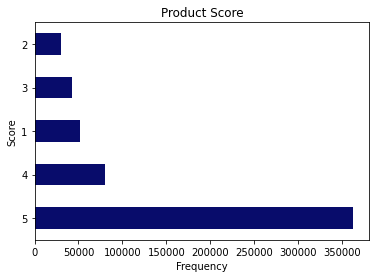

In [ ]:
import matplotlib.pyplot as plt

# Create bar chart
df['Score'].value_counts().plot(kind='barh', color='#080C6B')

# Add title and labels
plt.title('Product Score')
plt.xlabel('Frequency')
plt.ylabel('Score')

# Show plot
plt.show()


**From here, we can see that most of the customer rating is positive. This leads me to believe that most reviews will be pretty positive too, which will be analyzed in a while**

**Now, we can create some wordclouds to see the most frequently used words in the reviews.**
> A word cloud (also known as a tag cloud) is a visual representation of the most frequently used words in a piece of text. In sentiment analysis, a word cloud can be used to quickly identify the most common words used in a particular sentiment (e.g. positive or negative).

>For example, a word cloud of a dataset of customer reviews of a product could be generated and the most common words in positive reviews would be larger and more prominent in the cloud, while the less common words would be smaller. This would allow you to quickly identify the most important words that are associated with a particular sentiment, which can be useful for understanding the overall sentiment of the text.

>A word cloud can be created using various libraries such as wordcloud, matplotlib, and others. You can use a set of stop words to exclude common words that don't carry much meaning such as "the" , "a" , "of" and more.

**You may use a wordcloud when you want to :**
1. visualize the most common words in a dataset
2. identify the most important words that are associated with a particular sentiment
3. quickly understand the overall sentiment of a piece of text
4. identify any common themes or topics in



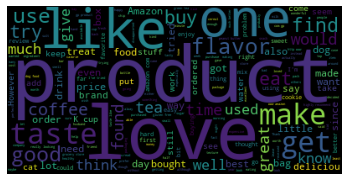

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])

textt = " ".join(review for review in df.Text)

wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()


**Some popular words that can be observed here include “taste,” “product,” “love,” and “Amazon.” These words are mostly positive, also indicating that most reviews in the dataset express a positive sentiment.**

## Step 3: Classifying Tweets
**In this step, we will classify reviews into “positive” and “negative,” so we can use this as training data for our sentiment classification model.**

* Positive reviews will be classified as +1, and negative reviews will be classified as -1.

* We will classify all reviews with ‘Score’ > 3 as +1, indicating that they are positive.

* All reviews with ‘Score’ < 3 will be classified as -1. Reviews with ‘Score’ = 3 will be dropped, because they are neutral. Our model will only classify positive and negative reviews.

In [ ]:
import numpy as np

df = df[df['Score'] != 3]

df['sentiment'] = np.nan
df.loc[df['Score'] > 3, 'sentiment'] =  1 # positive class
df.loc[df['Score'] < 3, 'sentiment'] =  -1 # negative class


<ipython-input-3-c6bb45c1a787>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = np.nan
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df['sentiment'].value_counts()

 1.0    443777
-1.0     82037
Name: sentiment, dtype: int64

In [ ]:
positive =df[df['sentiment']== 1]
negative =df[df['sentiment']== -1]


In [ ]:
positive=positive.dropna()
negative=negative.dropna()

print(positive.isnull().sum().sum())
print(negative.isnull().sum().sum())

0
0


In [ ]:
positive.tail(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,...",1.0


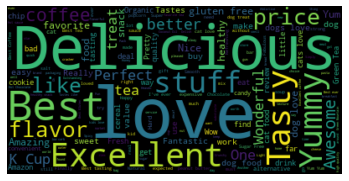

In [ ]:
stopwords.update(["br", "href","good","great","product","taste"]) 


pos = " ".join(review for review in positive.Summary)

wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

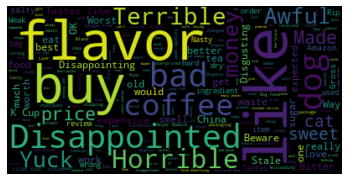

In [ ]:
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()


* **As seen above, the positive sentiment word cloud was full of positive words, such as “love,” “best,” and “delicious.”**

* **The negative sentiment word cloud was filled with mostly negative words, such as “disappointed,” and “yuck.”**

* **The words “good” and “great” initially appeared in the negative sentiment word cloud, despite being positive words. This is probably because they were used in a negative context, such as “not good.” Due to this, I removed those two words from the word cloud.**

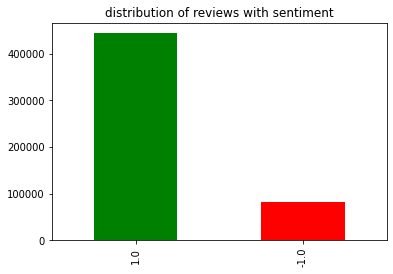

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()
colors = {1: 'green', -1: 'red'}
sentiment_counts.plot(kind="bar",color=[colors[x] for x in sentiment_counts.index] ,title='distribution of reviews with sentiment')
plt.show()


## Data Cleaning and Pre-Processing :


### standardizing text
* The function then uses regular expressions to replace commonly used contractions in English with their full form. For example, it replaces "won't" with "will not", "wouldn't" with "would not", and "can't" with "cannot". The function then returns the modified string.

* It is likely that this code is being used to pre-process text data in order to standardize the text, making it easier to process and analyze.
* standardizing text is used to adjust the format and structure of text data.


In [ ]:
df_test=df.copy()

In [ ]:
import re
def standardize_text(text):
    text = re.sub(r"won’t", "will not", text)
    text = re.sub(r"would’t", "would not", text)
    text = re.sub(r"could’t", "could not", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"can’t", "can not", text)
    text = re.sub(r"n’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    return text

df_test['Text'] = df_test['Text'].apply(standardize_text)


### convert the all reviews into the lower case

In [ ]:
def convert_to_lower(text):
    final=text.apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    return final


df_test['Text'] = convert_to_lower(df_test['Text'])

###  Remove the HTML tags and URLs from the reviews. if it's found  

In [ ]:
from bs4 import BeautifulSoup
import re

def Remove_the_HTML_tags_and_URLs(text):
    if not isinstance(text, str):
        return text
    
    final=text.apply(lambda x: BeautifulSoup(x, "html.parser").prettify())
    
    if re.search(r"<.*?>|http\S+", text) is None:
        return text
    
    final=text.apply(lambda x: re.sub(r"http\S+", "", x))
    final=text.apply(lambda x: re.sub(r"<.*?>", "", x))
    return final

df_test['Text'] = Remove_the_HTML_tags_and_URLs(df_test['Text'])

### To clarify the code above
* **The isinstance() function is used to check if the input passed is an instance of a certain data type.
    In this case, it is checking if text is an instance of the str data type. 
    If the input passed is not a string, the isinstance() function will return False and the if statement will evaluate to True, 
    causing the function to return the input unmodified.**
* **prettify() is a method of the BeautifulSoup object that is used to return a pretty-printed version of the HTML or XML content. 
    This means that it makes the content more human-readable by adding indentation and newlines.**
* **re.sub() function to remove all occurrences of any string that starts with <, ends with > and contains anything in between (r"<.*?>" is a regular expression that matches this pattern) in each element of the text variable and assigns the modified text to the final variable.**
* **re.sub() function to remove all occurrences of any string that starts with http and followed by any non-whitespace characters (r"http\S+" is a regular expression that matches this pattern) in each element of the text variable and assigns the modified text to the final variable.**

* **Parsing refers to the process of analyzing and interpreting a piece of text (in this case, HTML or XML) and breaking it down into its component parts so that it can be easily understood and processed. It's the process of extracting the meaningful information from the data.**

* **Navigating refers to the process of moving through the parsed content, finding and interacting with specific elements within it. It's the process of accessing and manipulating the information that has been extracted from the data.** 

* **So when we say "parse and navigate the HTML or XML content in x", it means that the BeautifulSoup() function takes the HTML or XML content in x and analyzes it, breaking it down into its component parts and creating a structured object that can be easily understood and processed. It also provides methods to access and manipulate the different elements of the HTML or XML content, such as finding specific tags or attributes, or extracting text from a specific element.**

### Remove_non_alpha_char

In [ ]:
import re
import nltk
nltk.download('punkt')
def Remove_non_alpha_char(text):
    final =  " ".join([re.sub('[^A-Za-z\s]+',"", x) for x in nltk.word_tokenize(text)])
    return final

df_test['Text'] = df_test['Text'].apply(Remove_non_alpha_char)

### Delete the extra spaces

In [ ]:
def extra_spaces(text):
    # Remove leading and trailing spaces
    final = text.strip()

# Remove multiple spaces between words
    final = re.sub(' +', ' ', text)
    
    return final
print("before=",df_test.loc[15,'Text'] )

df_test['Text'] = df_test['Text'].apply(extra_spaces)

print("before=",df_test.loc[15,'Text'] )


before= my daughter loves twizzlers and this shipment of six pounds really hit the spot  it s exactly what you would expect  six packages of strawberry twizzlers 
before= my daughter loves twizzlers and this shipment of six pounds really hit the spot it s exactly what you would expect six packages of strawberry twizzlers 


### To clarify the code above
* **This code defines a function "Remove_non_alpha_char" that takes in a text input, in this case the 'Text' and 'Summary' columns of a dataframe 'df'.**

* **The "Remove_non_alpha_char" function removes all non-alphabetic characters from the text, which includes punctuation marks and extra spaces.**
* **It applies a lambda function to the input text column, which tokenizes the text into words using the nltk.word_tokenize() function, and then iterates through each word, using a regular expression to keep only the alphabetic characters and removing all other non-alpha characters.**

* **The final result of this function is the text with non-alpha characters removed. The function is applied to the 'Text' and 'Summary' columns of the dataframe 'df' and the results are saved back to the same columns.**

In [ ]:
dff=df_test.copy()

###  Remove the stop words by using the NLTK package


In [ ]:
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stop = stopwords.words('english')
# dff['Text']=dff['Text'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [ ]:
# print("after=",dff.loc[15,'Text'] )


### Perform lemmatization using the wordnet lemmatizer


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

dff['Text']=dff['Text'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Split the Dataframe
>The new data frame should only have two columns — “Text”, and “sentiment” (the target variable).

In [ ]:
dfNew = dff[['Text','sentiment']]
dfNew.head()

,Text,sentiment
0,i have bought several of the vitality canned d...,1.0
1,product arrived labeled a jumbo salted peanut ...,-1.0
2,this is a confection that ha been around a few...,1.0
3,if you are looking for the secret ingredient i...,-1.0
4,great taffy at a great price there wa a wide a...,1.0


In [ ]:
# We will now split the data frame into train and test sets.
#80% of the data will be used for training, and 20% will be used for testing.

from sklearn.model_selection import train_test_split

train, test = train_test_split(dfNew, test_size=0.2, random_state=42)


### Create a bag of words

> we will use a count vectorizer from the Scikit-learn library.

>This will transform the text in our data frame into a bag of words model, which will contain a sparse matrix of integers. The number of occurrences of each word will be counted and printed.

>We will need to convert the text into a bag-of-words model since the logistic regression algorithm cannot understand text.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Text'])
test_matrix = vectorizer.transform(test['Text'])

### Split target and independent variables

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
# X_train = X_train.toarray()
# X_test = X_test.toarray()


### TfidfVectorizer

In [ ]:
train, test = train_test_split(dfNew, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(train['Text'])
tf_x_test = vectorizer.transform(test['Text'])

### trying undersampling/oversampling techniques to fix the unbalanced data

In [ ]:
# undersampling

from imblearn.under_sampling import RandomUnderSampler

# Create an instance of the RandomUnderSampler class
undersampler = RandomUnderSampler()

X_train_res, y_train_res = undersampler.fit_resample(tf_x_train,train['sentiment'])

X_test_res, y_test_res = undersampler.fit_resample(tf_x_test,test['sentiment'])

In [ ]:
# oversampling 

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_res_over, y_train_res_over = sm.fit_resample(tf_x_train,train['sentiment'])

X_test_res_over, y_test_res_over = sm.fit_resample(tf_x_test,test['sentiment'])


In [ ]:
y_test_res_over.value_counts()

 1.0    88784
-1.0    88784
Name: sentiment, dtype: int64

###LogisticRegression with TfidfVectorizer and oversampling techniques

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model=LogisticRegression()
model.fit(X_train_res_over, y_train_res_over)

y_pred=model.predict(X_test_res_over)   
print("f1 score=",f1_score(y_test_res_over,y_pred))

f1 score= 0.9296159690018807


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


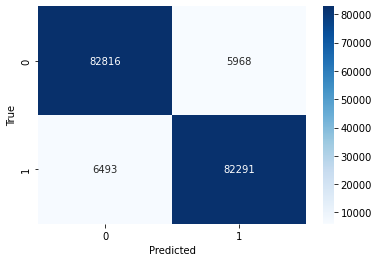

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix((y_test_res_over,y_pred))

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_res_over,y_pred))

              precision    recall  f1-score   support

        -1.0       0.93      0.93      0.93     88784
         1.0       0.93      0.93      0.93     88784

    accuracy                           0.93    177568
   macro avg       0.93      0.93      0.93    177568
weighted avg       0.93      0.93      0.93    177568



###SVC with TfidfVectorizer and oversampling techniques

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

# test resamplinng 

clf.fit(X_train_res_over, y_train_res_over)

y_pred=clf.predict(X_test_res_over)   
print("f1 score=",f1_score(y_test_res_over,y_pred))

f1 score= 0.932041871948699


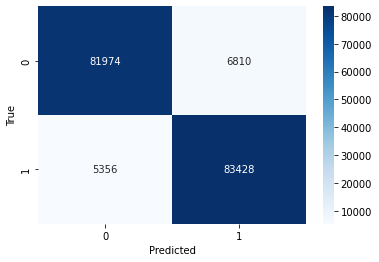

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_res_over,y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
print(classification_report(y_test_res_over,y_pred))

              precision    recall  f1-score   support

        -1.0       0.94      0.92      0.93     88784
         1.0       0.92      0.94      0.93     88784

    accuracy                           0.93    177568
   macro avg       0.93      0.93      0.93    177568
weighted avg       0.93      0.93      0.93    177568



###XGBClassifier with TfidfVectorizer and oversampling techniques

In [ ]:
y_train_res_over = np.where(y_train_res_over == -1, 0, 1)
y_test_res_over = np.where(y_test_res_over == -1, 0, 1)


from xgboost import XGBClassifier
clf = XGBClassifier()

clf.fit(X_train_res_over, y_train_res_over)

y_pred = clf.predict(X_test_res_over)
print("f1 score=",f1_score(y_test_res_over, y_pred))


f1 score= 0.8804991539763113


### LogisticRegression with TfidfVectorizer and   undersampling techniques

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model=LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred=model.predict(X_test_res)   
print("f1 score=",f1_score(y_test_res,y_pred))

f1 score= 0.9039586283322046


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


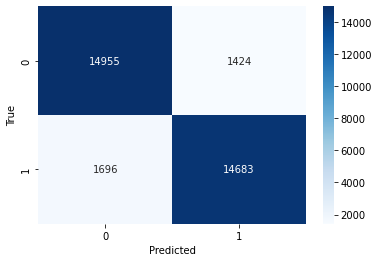

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_res,y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## SVC with TfidfVectorizer and undersampling techniques

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

# test resamplinng 

clf.fit(X_train_res, y_train_res)

ypred=clf.predict(X_test_res)   
print("f1 score=",f1_score(y_test_res,ypred))

f1 score= 0.9118724412842059


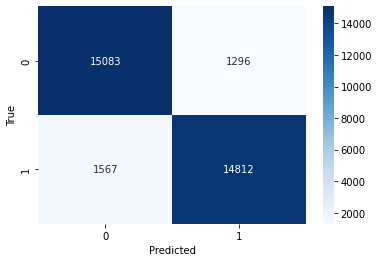

In [ ]:
conf_matrix = confusion_matrix(y_test_res,ypred)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### XGBClassifier with TfidfVectorizer and undersampling techniques

**we got a error say "ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [-1.1.]
 "**
 
**XGBoost classifier is expecting the classes [0, 1]. To fix this, you can convert the y_train_res and y_test_res to the correct format by using the numpy where function**

In [ ]:
y_train_res = np.where(y_train_res == -1, 0, 1)
y_test_res = np.where(y_test_res == -1, 0, 1)


from xgboost import XGBClassifier
clf = XGBClassifier()

clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test_res)
print("f1 score=",f1_score(y_test_res, y_pred))


f1 score= 0.8051964392438111


#### To clarify what happend in the code above
* **The np.where() function is used to check the condition y_train_res == -1 for each element in the y_train_res array. If the condition is true, the corresponding element in the resulting array is set to 0, otherwise it is set to 1. This is done for both y_train_res and y_test_res.**

* **So, this code is converting the -1 value of target variable to 0 and 1 value of target variable to 1. This is done to make the target variable a binary variable suitable for binary classification.**